### Suppose you are working in a data-driven job role, and you have to answer all these questions.
1) First, write a code where, by changing just the keyword, we can search for multiple things.
2) Top 15 countries where the keywords are searched the most, and also create visual representation of it.
3) A world map needs to be plotted showing the countries that search the keyword the most.
4) We need to extract the time-wise interest of the keyword — how it trended in different years.
5) Compare related keywords and plot the graph.

In [1]:
!pip install pytrends

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

In [3]:
# setting up the pytrend library and keyword define
pytrends = TrendReq(hl="en-US", tz=360)
keyword = 'AI'

### Data Request

In [4]:
pytrends.build_payload([keyword], cat=0, timeframe='today 5-y', geo='', gprop='')
# timeframe = from today to previous 5 years data, geo=global, grpop=I want only google search data.


In [5]:
# country wise interest
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(15)

/tmp/ipython-input-62069337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword], y=region_data.index, palette='viridis')


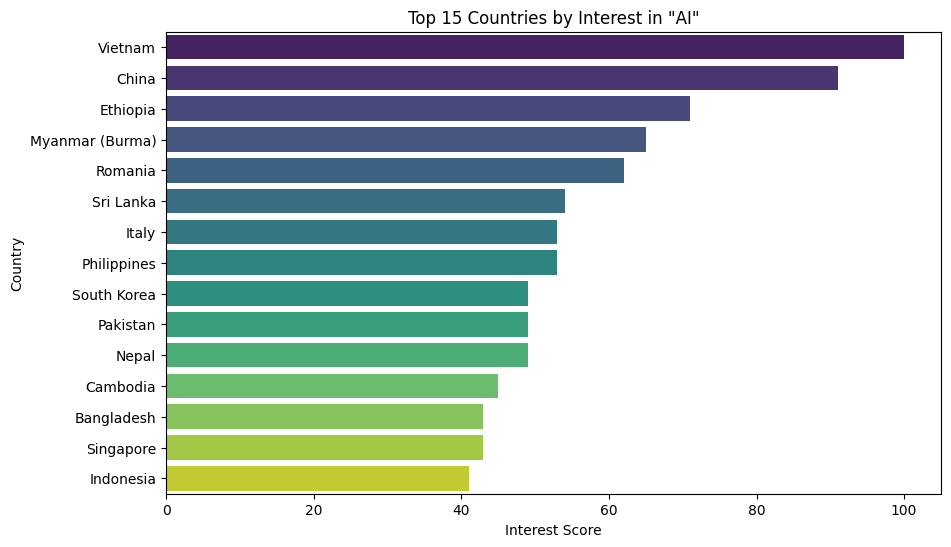

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x=region_data[keyword], y=region_data.index, palette='viridis')
plt.title(f'Top 15 Countries by Interest in "{keyword}"')
plt.xlabel('Interest Score')
plt.ylabel('Country')
plt.show()

### Creating the World Map

In [7]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color=keyword,
                    hover_name='geoName',
                    title=f'Search Interest in "{keyword}" by Country',
                    color_continuous_scale='Viridis')
fig.show()
# choropleth helps to create world map

### Time wise search interest

In [8]:
time_df = pytrends.interest_over_time()
# time_df.drop(columns=['isPartial'], inplace=True)
# time_df.head()

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



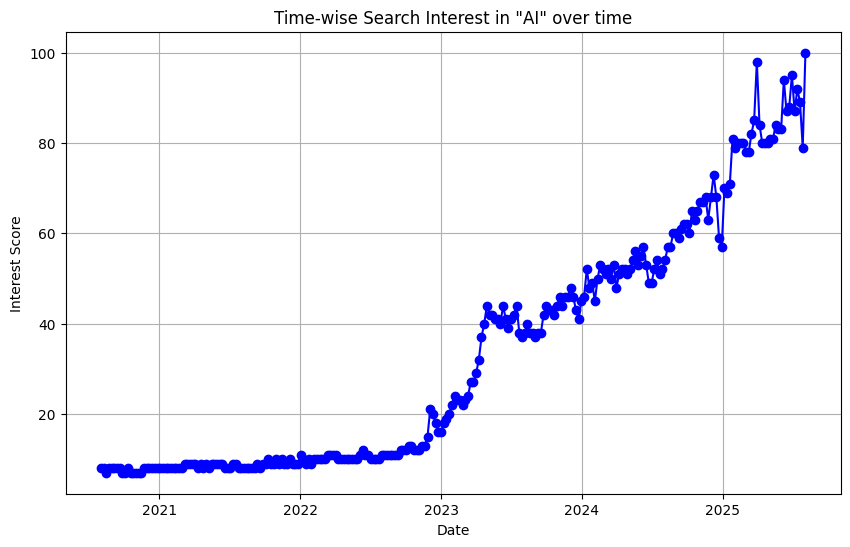

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='blue')
plt.title(f'Time-wise Search Interest in "{keyword}" over time')
plt.xlabel('Date')
plt.ylabel('Interest Score')
plt.grid(True)
plt.show()

### Comparing multiple keywords

In [10]:
kw_list = ['Machine Learning', 'Deep Learning', 'Data Science', 'Data Analysis', 'Big Data']
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



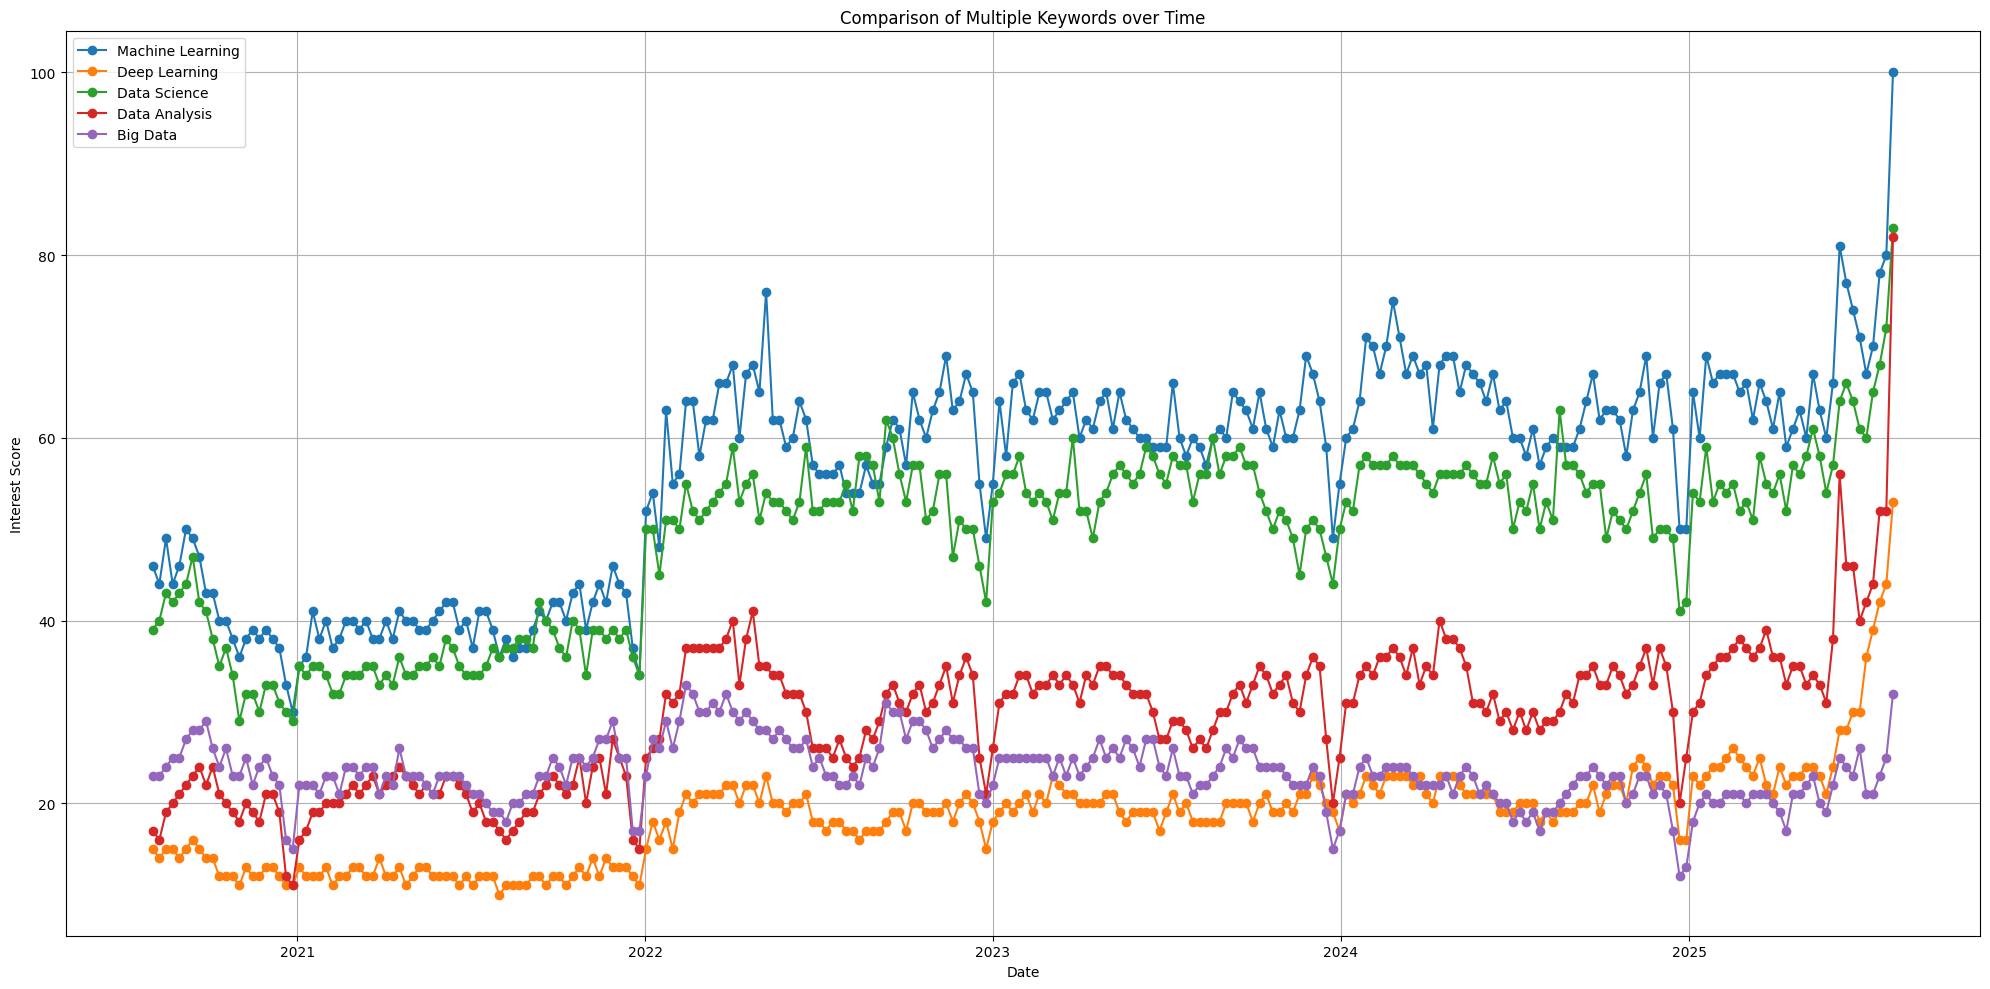

In [11]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize=(20, 10))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], marker='o', label=kw)

plt.title('Comparison of Multiple Keywords over Time')
plt.xlabel('Date')
plt.ylabel('Interest Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Deeper Exploratory Data Analysis (EDA)

In [16]:
from ydata_profiling import ProfileReport
profile = ProfileReport(time_df, title="Extended EDA Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:00<00:00, 232.06it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

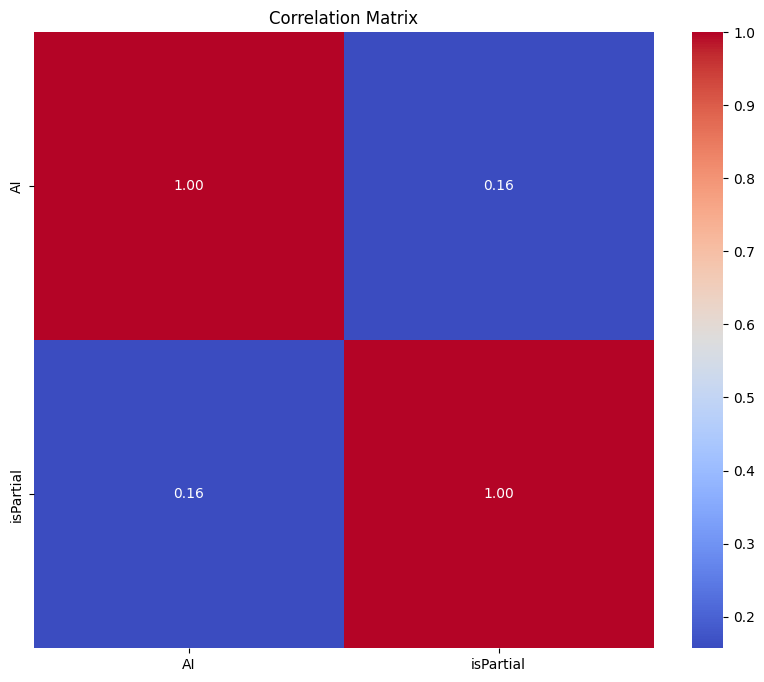

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = time_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Advanced Visualizations & Interactivity

In [19]:
import plotly.express as px
fig = px.scatter(time_df, x='AI', y='isPartial', title="Interactive Scatter using AI and isPartial")
fig.show()

### Time-Series Analysis

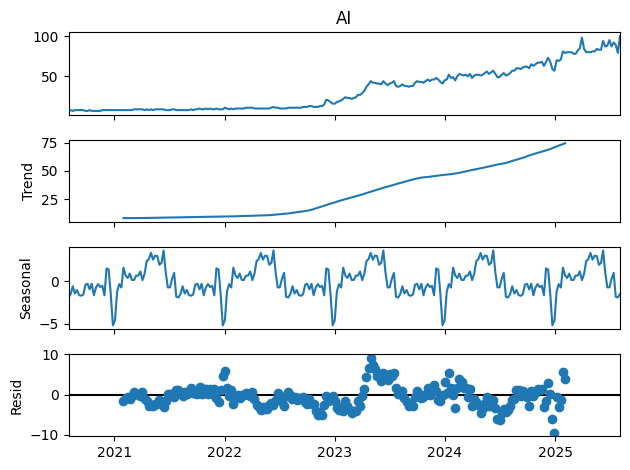

In [24]:
import statsmodels.api as sm
# time_df['date'] = pd.to_datetime(time_df['date']) # Remove this line as 'date' column doesn't exist
# time_df.set_index('date', inplace=True) # Remove this line as index is already DatetimeIndex
decomp = sm.tsa.seasonal_decompose(time_df['AI'], period=52) # Perform decomposition on 'AI' column, assuming weekly data (52 weeks in a year)
decomp.plot()
plt.show()

### Clustering / Segmentation

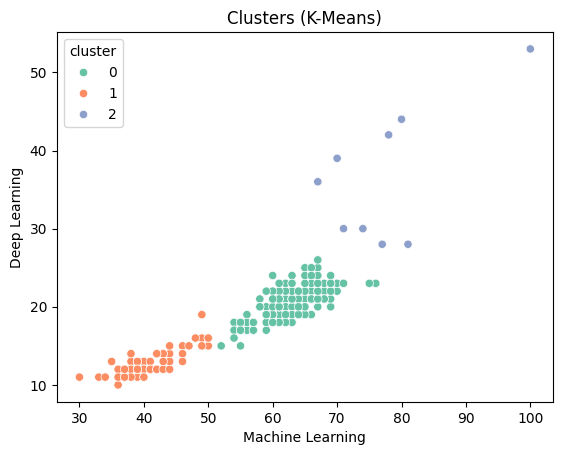

In [28]:
from sklearn.cluster import KMeans
features = compare_df.select_dtypes(include=np.number) # Select only numerical columns for clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(features) # Added n_init to suppress warning
compare_df['cluster'] = kmeans.labels_

# Visualize the clusters (you might need to choose appropriate columns for visualization)
# For demonstration, let's visualize using the first two numerical columns
if features.shape[1] >= 2:
    sns.scatterplot(data=compare_df, x=features.columns[0], y=features.columns[1], hue='cluster', palette='Set2')
    plt.title('Clusters (K-Means)')
    plt.show()
else:
    print("Not enough numerical columns in compare_df to create a scatter plot for clusters.")

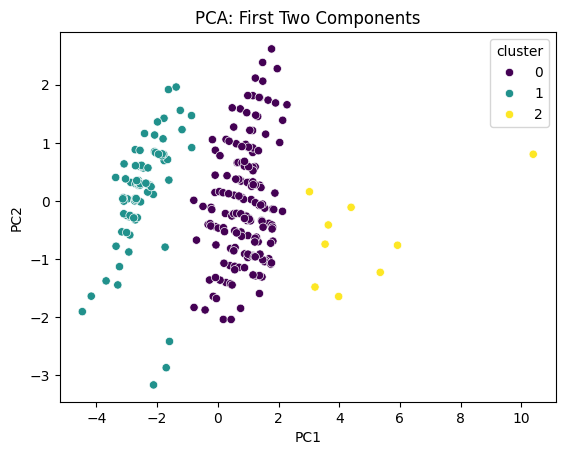

In [34]:
from sklearn.decomposition import PCA
features_scaled = (features - features.mean()) / features.std()
pca = PCA(n_components=2)
components = pca.fit_transform(features_scaled)
compare_df['PC1'], compare_df['PC2'] = components[:, 0], components[:, 1]

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=compare_df, palette='viridis')
plt.title('PCA: First Two Components')
plt.show()